# Breast Cancer Classification

This exercise uses <a href="https://wiki.cancerimagingarchive.net/display/Public/CBIS-DDSM#385f2cd4e86f4142b1d32bdb5803bd96"> the CBIS-DDSM (Curated Breast Imaging Subset of DDSM) dataset</a>. For the purpose of working on deep learning models regarding the csv files, we focus on two below datasets, which contain several features related to Mammography and dectection of breast cancer. 

Mass-Training-Description (csv)	
Mass-Test-Description (csv)	


The Mass-Training-Description and Mass-Test-Description include these columns:

patient_id	
breast_density	
left or right breast	
image view		
abnormality id		
abnormality type	
mass shape	
mass margins	
assessment	
pathology

There is more data in this dataset, including images, but for this homework we will not focus on them.

We are interested in this question:	
Using variables:	

breast_density	
left or right breast	
image view		
abnormality id		
abnormality type	
mass shape	
mass margins	

The goal of this exercise is to predict the **pathology type**



### Data Preparation

The output of your script should be a matrix X and a vector Y, where each row of X are one set of variables for a patient, and each row of Y is the pathology type class, for that patient.	

Use *matplotlib.imshow* to visualize the X.	
(And if there are multiple equivalent rows per patient, keep only one of them - any, up to you)


In [1]:
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pylab as plt
from torch.utils.data import Dataset, DataLoader


In [2]:
traindata = pd.read_csv('mass_case_description_train_set.csv')
testdata = pd.read_csv('mass_case_description_test_set.csv')

In [3]:
train_len = len(traindata)
dataset = pd.concat([traindata, testdata], axis=0)
dataset_x = dataset[['breast_density', 'left or right breast', 'image view', 'abnormality id',
                    'abnormality type', 'mass shape', 'mass margins']]
dataset_y = dataset[['pathology']]

In [7]:
dataset_preprocessed_x = pd.get_dummies(dataset_x)
dataset_preprocessed_y = pd.get_dummies(dataset_y)

In [8]:

train_X = dataset_preprocessed_x[train_len:]
test_X= dataset_preprocessed_x[train_len:]
train_y = dataset_preprocessed_y[:train_len]
test_y =  dataset_preprocessed_y[train_len:]


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class MyDataset(Dataset):
    
    def __init__(self, size, inputdf, labeldf):
        super(MyDataset, self).__init__()
        self.size = size
        self.inputdf = inputdf
        self.labeldf = labeldf
        
    def __len__(self):
        return self.size

    def __getitem__(self, index):
        x = torch.from_numpy(self.inputdf.iloc[index,:].as_matrix()).float().to(device)
       # y = torch.from_numpy(self.labeldf.iloc[index,:].as_matrix()).long().to(device)
        y = torch.from_numpy(train_y.iloc[index].as_matrix()).argmax().long().to(device)
                             
        return x, y

In [8]:
y_0 = torch.from_numpy(train_y.iloc[0].as_matrix()).argmax().long().to(device)
y_0
#y_0 = Variable(y_0).type(torch.LongTensor)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


tensor(2)

In [11]:
data_train = MyDataset(train_len, train_X, train_y)
data_test = MyDataset(len(testdata), test_X, test_y)

In [12]:
x, y = next(iter(data_train))
y

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


tensor(2)

In [13]:
data_train_loader = DataLoader(data_train, batch_size = 64, shuffle=True, num_workers=4)
data_test_loader = DataLoader(data_test, batch_size =64, shuffle=False, num_workers=4)


In [14]:
x, y = next(iter(data_train_loader))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.

IndexError: Caught IndexError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "<ipython-input-7-107d38c65bc7>", line 14, in __getitem__
    x = torch.from_numpy(self.inputdf.iloc[index,:].as_matrix()).float().to(device)
  File "/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 1418, in __getitem__
    return self._getitem_tuple(key)
  File "/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2092, in _getitem_tuple
    self._has_valid_tuple(tup)
  File "/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 235, in _has_valid_tuple
    self._validate_key(k, i)
  File "/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2014, in _validate_key
    self._validate_integer(key, axis)
  File "/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2088, in _validate_integer
    raise IndexError("single positional indexer is out-of-bounds")
IndexError: single positional indexer is out-of-bounds


### NOTE: Method of dataloader does not seem to work

In [9]:


def load_data(xintermed, yintermed):
    return xintermed.as_matrix().astype(float), yintermed.as_matrix().argmax(axis=1).astype(np.int64).reshape(-1,1)

xtrain, ytrain = load_data(train_X, train_y)
xtest, ytest = load_data(test_X, test_y)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


### Linear Model

In [22]:
class LogReg(nn.Module):
    def __init__(self):
        super(LogReg, self).__init__()
        self.linear = nn.Linear(in_features=46, out_features=3)
        
    def forward(self, x):
        x = x.contiguous().view(-1, 46)
        # return logits
        x = self.linear(x)
        return x
    
logreg_model = LogReg().double()
    

### Multi-perceptron Model

In [13]:
class MLPNet(nn.Module):
    def __init__(self):
        super(MLPNet, self).__init__()
        self.fc1 = nn.Linear(46, 100)
        self.fc2 = nn.Linear(100, 3)


    def forward(self, x):
        x = x.contiguous().view(-1,46)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = MLPNet().double()

In [14]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()
from sklearn.metrics import roc_auc_score

losslisttrain = []
losslisttest = []

for epoch in range(100):
    avg_loss = 0
    ix_shuffle = np.arange(xtrain.shape[0])
    np.random.shuffle(ix_shuffle)
    ypred =  np.zeros(ytrain.shape)
    for ix in ix_shuffle:
        optimizer.zero_grad()
        x = Variable(torch.from_numpy(xtrain[ix]))
        target = Variable(torch.LongTensor(ytrain[ix]))
        out = model(x)
        ypred[ix] = out.data.numpy().ravel()[2]
        loss = criterion(out, target)
        avg_loss += loss.data.numpy().ravel()[0]
        loss.backward()
        optimizer.step()
    losslisttrain.append(avg_loss/xtrain.shape[0])
    if epoch % 10 == 0:
        print('avg train loss is', avg_loss/xtrain.shape[0])
        print('AUC train is:', roc_auc_score(y_true=(ytrain==2), y_score=ypred))
plt.plot(losslisttrain); plt.show()

avg train loss is 0.9845289237723748
AUC train is: 0.48575831552546467
avg train loss is 0.9655068446581266
AUC train is: 0.46546541354596727
avg train loss is 0.9247075458218348
AUC train is: 0.4813853023418788
avg train loss is 0.8712832687191495
AUC train is: 0.49653524574858754
avg train loss is 0.833418969794098
AUC train is: 0.4938358264349454
avg train loss is 0.8092799747133431
AUC train is: 0.5061457317593252
avg train loss is 0.8036523363416338
AUC train is: 0.5132711844480251
avg train loss is 0.7958536282575195
AUC train is: 0.4990732992620973
avg train loss is 0.7918952807286221
AUC train is: 0.48641069440314255


KeyboardInterrupt: 

### Training and Testing

In [18]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()
from sklearn.metrics import roc_auc_score



#training
def train(model_name):
    losslisttrain = []
    losslisttest = []
    for epoch in range(100):
        avg_loss = 0
        ix_shuffle = np.arange(xtrain.shape[0])
        np.random.shuffle(ix_shuffle)
        ypred =  np.zeros(ytrain.shape)
        for ix in ix_shuffle:
            optimizer.zero_grad()
            x = Variable(torch.from_numpy(xtrain[ix]))
            target = Variable(torch.LongTensor(ytrain[ix]))
            out = model(x)
            ypred[ix] = out.data.numpy().ravel()[2]
            loss = criterion(out, target)
            avg_loss += loss.data.numpy().ravel()[0]
            loss.backward()
            optimizer.step()
        losslisttrain.append(avg_loss/xtrain.shape[0])
        if epoch % 10 == 0:
            print('avg train loss is', avg_loss/xtrain.shape[0])
            print('AUC train is:', roc_auc_score(y_true=(ytrain==2), y_score=ypred))
    plt.plot(losslisttrain); plt.show()

In [19]:
train(MLPNet().double())

avg train loss is 0.7960835390752542
AUC train is: 0.5222200706782204
avg train loss is 0.7717780540633845
AUC train is: 0.5008460178378367
avg train loss is 0.7669401781971869
AUC train is: 0.501544501229838
avg train loss is 0.7701515551361572
AUC train is: 0.49887274462479
avg train loss is 0.7597523532944783
AUC train is: 0.5051590951528018
avg train loss is 0.7437912389606737
AUC train is: 0.5163763234877142
avg train loss is 0.7826792988148253
AUC train is: 0.5158322902186968


KeyboardInterrupt: 

avg train loss is 1.115470456995946
AUC train is: 0.4205941949806015
avg train loss is 1.1154704569959453
AUC train is: 0.4205941949806015
avg train loss is 1.115470456995947
AUC train is: 0.4205941949806015
avg train loss is 1.1154704569959466
AUC train is: 0.4205941949806015
avg train loss is 1.1154704569959455
AUC train is: 0.4205941949806015
avg train loss is 1.1154704569959448
AUC train is: 0.4205941949806015
avg train loss is 1.1154704569959455
AUC train is: 0.4205941949806015
avg train loss is 1.1154704569959455
AUC train is: 0.4205941949806015
avg train loss is 1.115470456995945
AUC train is: 0.4205941949806015
avg train loss is 1.1154704569959455
AUC train is: 0.4205941949806015


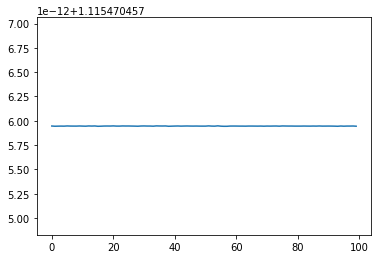

In [28]:
train(MLPNet_model)